# Лабораторная работа 2 X.9.6
# Суточные колебания концентрации озона в атмосфере

## Импорты и глобальные переменные

In [198]:
import numpy as np
import matplotlib.pyplot as plt

Omega = np.pi/43200
Step = 0.1728

## Условие задачи

\begin{equation*}
    \begin{cases}
      	y_0' = f_0(t, y_0, y_1, y_2) = -k_0y_0y_1 - k_1y_0y_2 + 2k_2(t)y_1 + k_3(t)y_2,\\
	    y_1' = f_1(t, y_0, y_1, y_2) = 0,\\
		y_2' = f_2(t, y_0, y_1, y_2) = k_0y_0y_1 - k_1y_0y_2 - k_3(t)y_2.
    \end{cases}
\end{equation*}

где $y_0(0) = 10^6 (см^{-3})$, $y_1(0) = 3.7*10^{16} (см^{-3})$, $y_2(0) = 10^{12} (см^{-3})$

\begin{equation*}
	k_0 = 1.63 * 10^{-16}
\end{equation*}

\begin{equation*}
	k_1 = 4.66 * 10^{-16}
\end{equation*}

\begin{equation*}
k_i = 
    \begin{cases}
      	\exp(-c_i/\sin(\omega t)), \sin(\omega t) > 0\\
	    0, \sin(\omega t) < 0
    \end{cases}
\end{equation*}

где $\omega = \pi/43200 c^{-1}$, $c_2 = 22.62$, $c_3 = 7.601$

Конечное время интегрирования $T = 172800 c$ (двое суток)

In [199]:
def k0(t):
    return 1.63*np.power(10.0, -16)

def k1(t):
    return 4.66*np.power(10.0, -16)

def k2(t):
    var = np.sin(Omega*t)
    if var > 0:
        return np.exp(-22.62/var)
    return 0

def k3(t):
    var = np.sin(Omega*t)
    if var > 0:
        return np.exp(-7.601/var)
    return 0

def f0(t, y):
    return -k0(t)*y[0]*y[1] - k1(t)*y[0]*y[2] + 2*k2(t)*y[1] + k3(t)*y[2]

def f1(t, y):
    return 0

def f2(t, y):
    return k0(t)*y[0]*y[1]-k1(t)*y[0]*y[2]-k3(t)*y[2]

def func(t, y):
    return np.array([f0(t, y), f1(t, y), f2(t, y)])

## Двушаговый неявный метод Рунге-Кутта 3-го порядка

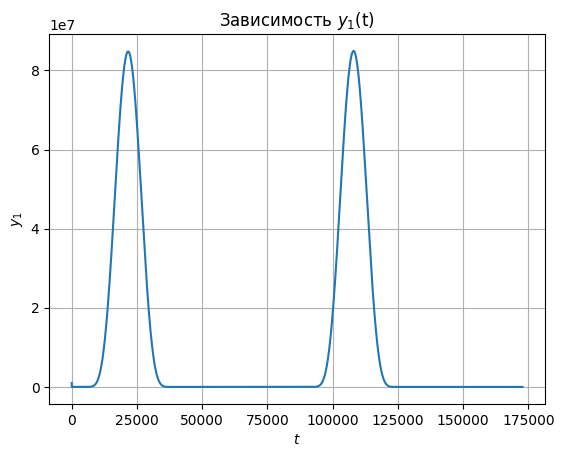

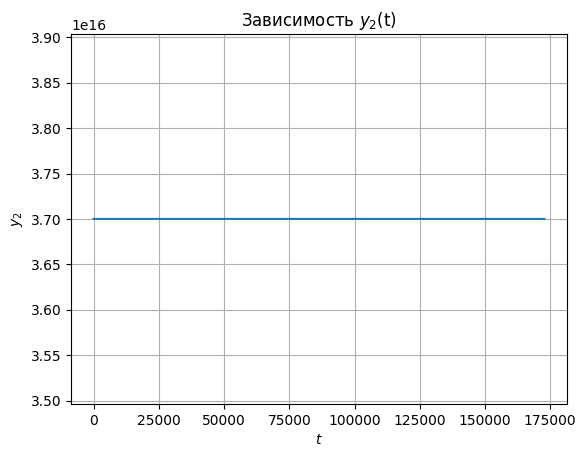

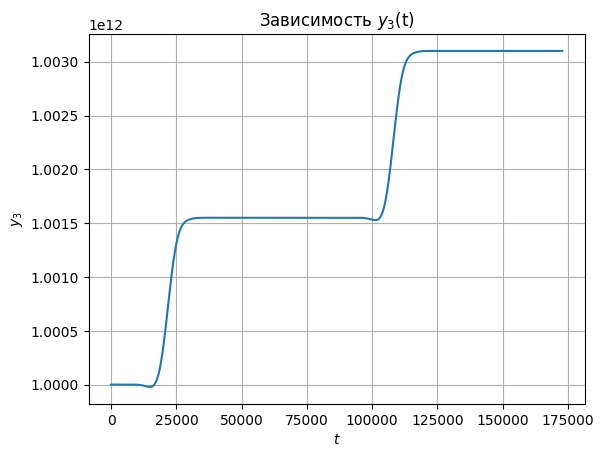

In [200]:
def Runge_Kutta(t_start, y_start, func, num_of_iter):
    t = t_start
    dim = len(y_start)
    y = np.zeros((1, dim))
    y[0] = y_start

    gamma = 1/2 + np.sqrt(3)/6
    b = np.array([1/2, 1/2])
    c = np.array([gamma, 1-gamma])
    a = np.array([[gamma, 0], [1-2*gamma, gamma]])

    for i in range(num_of_iter):
        k = np.array([np.zeros (len(y_start)) for l in range(2)])
        for j in range(2):
            k = np.array([func(t + Step*c[n], y[-1] + Step*(a[n][0]*k[0] + a[n][1]*k[1])) for n in range(2)])
        y = np.append(y, np.array([y[-1] + 2*Step*(b[0]*k[0]+b[1]*k[1])]), axis=0)
        t += Step*100
    
    return y

y = Runge_Kutta(0, np.array([np.power(10, 6), 3.7 * np.power(10, 16), np.power(10, 12)]), func, int(1728/Step))

fig = plt.figure()
plt.title('Зависимость $y_1$(t)')
plt.xlabel("$t$")
plt.ylabel("$y_1$")
plt.grid()
plt.plot(np.linspace (0, 172800, num=len(y)), y[:, 0], '-')

fig = plt.figure()
plt.title('Зависимость $y_2$(t)')
plt.xlabel("$t$")
plt.ylabel("$y_2$")
plt.grid()
plt.plot(np.linspace (0, 172800, num=len(y)), y[:, 1], '-')

fig = plt.figure()
plt.title('Зависимость $y_3$(t)')
plt.xlabel("$t$")
plt.ylabel("$y_3$")
plt.grid()
plt.plot(np.linspace (0, 172800, num=len(y)), y[:, 2], '-')